In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("EscherichiaColiK12_cocomp_hq.txt",sep="\t",usecols=["Uniprot_A","Uniprot_B"])

In [3]:
df

,Uniprot_A,Uniprot_B
0,A0A385XK32,P33643
1,A0A4C3GMC1,P0A823
2,O32528,P0A6M8
3,O52124,Q47184
4,P00350,P00393
...,...,...
17574,Q46898,Q46899
17575,Q46898,Q46901
17576,Q46906,Q46906
17577,Q8VNN2,Q8VNN2


In [4]:
G=nx.from_pandas_edgelist(df,"Uniprot_A","Uniprot_B",create_using=nx.DiGraph())


## Visualization Between Nodes and Degrees

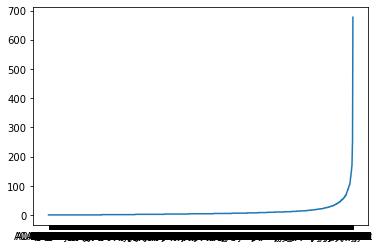

In [6]:
degrees=dict(G.degree())
order=sorted(degrees.items(),key=lambda t:t[1])
x,y=zip(*order)
plt.plot(x,y)
plt.show()

In [49]:
degrees

{'A0A385XK32': 1,
 'P33643': 20,
 'A0A4C3GMC1': 1,
 'P0A823': 5,
 'O32528': 1,
 'P0A6M8': 56,
 'O52124': 1,
 'Q47184': 1,
 'P00350': 12,
 'P00393': 11,
 'P02918': 79,
 'P09832': 17,
 'P0ABU7': 52,
 'P0AEI4': 30,
 'P18843': 477,
 'P25526': 12,
 'P33195': 22,
 'P37751': 76,
 'P37902': 2,
 'P39274': 15,
 'P75914': 7,
 'P00363': 10,
 'P0A9L8': 30,
 'P0CF91': 1,
 'P16916': 28,
 'P23886': 6,
 'P31473': 26,
 'P39385': 8,
 'P68767': 7,
 'P76111': 1,
 'P00370': 1,
 'P77169': 7,
 'P06282': 3,
 'P0A6B4': 6,
 'P0A7V3': 222,
 'P0A7X3': 158,
 'P0ADQ7': 26,
 'P0AFP6': 45,
 'P11454': 8,
 'P60422': 385,
 'P67910': 69,
 'P76773': 21,
 'P00448': 6,
 'P0A996': 23,
 'P23839': 16,
 'P25888': 35,
 'P37326': 14,
 'P76459': 2,
 'P00452': 11,
 'P07004': 14,
 'P0A8A2': 22,
 'P0A9X4': 83,
 'P0CE47': 176,
 'P0CE48': 139,
 'P33363': 17,
 'P69924': 14,
 'P75793': 6,
 'P76558': 12,
 'P00490': 34,
 'P00582': 38,
 'P03018': 39,
 'P05055': 49,
 'P06612': 63,
 'P06959': 86,
 'P09030': 19,
 'P0A6C1': 12,
 'P0A7K6': 142,
 

# Number of Proteins

In [8]:
len(degrees)

3108

# Visualization Between Degree and Freqency of Degrees

<BarContainer object of 119 artists>

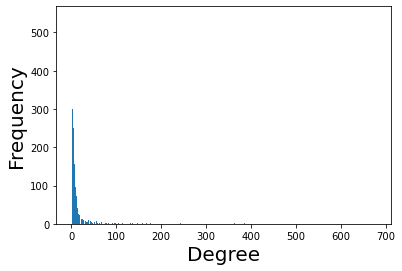

In [16]:
from collections import Counter
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plot_x = list(set(degree_sequence))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

## Visualization Between Degrees(K) and probabilty of Frequency of Degrees(PK)

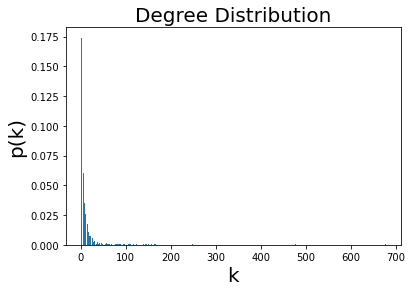

In [34]:
import math
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
   
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
   
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
plot_degree_dist(G)
    

## Visualization Between Degrees(K) and log of probabilty of Frequency of Degrees P(K)

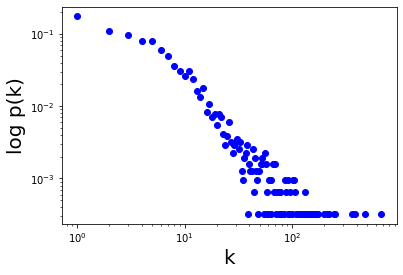

In [37]:
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
   
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    plt.figure()
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.show()
plot_degree_dist(G) 

# getting Hubs protein

In [38]:
best_proteins=[]

In [39]:
for x in range(len(order)-1,len(order)-(int(len(order)*0.05)),-1):
       best_proteins.append(order[x][0])

In [40]:
best_proteins

['P0A6F5',
 'P18843',
 'P60422',
 'P0A6Y8',
 'P60723',
 'P0A7V8',
 'P0A7V3',
 'P0A7V0',
 'P0A7W1',
 'P0CE47',
 'P0A7M2',
 'P0A7L0',
 'P0A717',
 'P0A7X3',
 'P02359',
 'P60438',
 'P0A7K2',
 'P0AG44',
 'P0AA10',
 'P0A7K6',
 'P0CE48',
 'P0A9K9',
 'P0A7S9',
 'P61175',
 'P0A7R5',
 'P0AG59',
 'P0A8T7',
 'P0ACF0',
 'P08622',
 'P0ADZ0',
 'P0AG67',
 'P0AFG8',
 'P0AG48',
 'P0A7U7',
 'P0A6F9',
 'P0A850',
 'P0A9P6',
 'P0A8V2',
 'P37765',
 'P0A7Z4',
 'P36979',
 'P02413',
 'P10408',
 'P0AGJ5',
 'P0AG55',
 'P13035',
 'P0A7T3',
 'P0A9Y6',
 'P0A9P0',
 'P0A7R1',
 'P39177',
 'P62399',
 'P0AC41',
 'P0ACF4',
 'P06959',
 'P63284',
 'P0A9X4',
 'P0A6X3',
 'P02358',
 'P0A9M0',
 'P02918',
 'P60624',
 'P0A8M6',
 'P0ABH9',
 'Q8VNN2',
 'P37751',
 'P0ABT2',
 'P0AA39',
 'P21499',
 'P0A7J3',
 'P10443',
 'P0AG30',
 'P0ACF8',
 'P67910',
 'P15288',
 'P0ADY7',
 'P0DP90',
 'P0AG24',
 'P0AAS7',
 'P0A6G7',
 'P0AGK4',
 'P0A707',
 'P0A7Y8',
 'P21645',
 'P06612',
 'P0AGJ6',
 'P0AFG0',
 'P22523',
 'P09373',
 'P0A9K3',
 'P0A6P9',

# Number of Hubs protein

In [41]:
len(best_nodes)

154